<a href="https://colab.research.google.com/github/Debayan97531/CarPrice_DataScience_Task3/blob/main/CarPrice_DataScience_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [3]:
car_dataset=pd.read_csv('/content/car data.csv')

In [4]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
car_dataset.shape

(301, 9)

In [6]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the Categoricla Data

In [10]:
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [11]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting data and target

In [12]:
X=car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y=car_dataset['Selling_Price']

In [13]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [14]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting Training and test data

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=3)

Model Training




1.Linear Regression

In [28]:
lin_model=LinearRegression()

In [18]:
lin_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [20]:
#prediction on training data
train_data_predict=lin_model.predict(X_train)

In [21]:
#R squared error
error_score = metrics.r2_score(Y_train,train_data_predict)
print("R squared error",error_score)

R squared error 0.8849815853900536


Visualize actual and predicted price

Text(0.5, 1.0, 'Actual Vs Predicted')

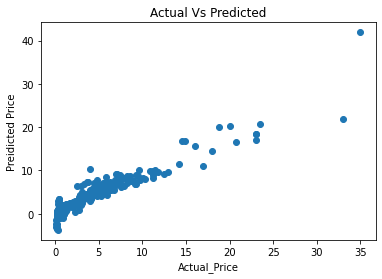

In [22]:
plt.scatter(Y_train,train_data_predict)
plt.xlabel("Actual_Price")
plt.ylabel("Preidicted Price")
plt.title("Actual Vs Predicted")

In [23]:
#prrediction on test data
test_data_predict=lin_model.predict(X_test)


In [24]:
#R squared error
error_score = metrics.r2_score(Y_test,test_data_predict)
print("R squared error",error_score)

R squared error 0.7979072218427206


Text(0.5, 1.0, 'Actual vs Predicted Price')

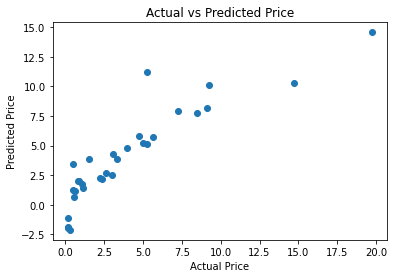

In [25]:
plt.scatter(Y_test,test_data_predict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual vs Predicted Price")


2.Lasso Regression

In [30]:
lasso_model=Lasso()

In [31]:
lasso_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [32]:
#prediction on training data
train_data_predict=lasso_model.predict(X_train)

In [33]:
#R squared error
error_score = metrics.r2_score(Y_train,train_data_predict)
print("R squared error",error_score)

R squared error 0.8469788692279795


Visualize actual and predicted price

Text(0.5, 1.0, 'Actual Vs Predicted')

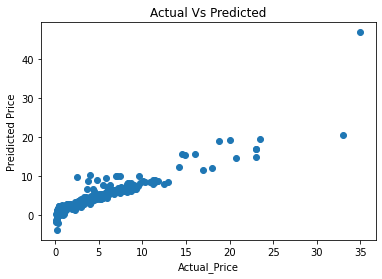

In [34]:
plt.scatter(Y_train,train_data_predict)
plt.xlabel("Actual_Price")
plt.ylabel("Preidicted Price")
plt.title("Actual Vs Predicted")

In [36]:
#prrediction on test data
test_data_predict=lasso_model.predict(X_test)


In [39]:
#R squared error
error_score = metrics.r2_score(Y_test,test_data_predict)
print("R squared error",error_score)

R squared error 0.7946492652998925


Text(0.5, 1.0, 'Actual vs Predicted Price')

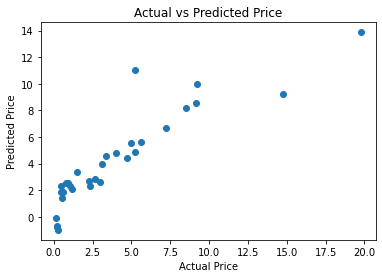

In [40]:
plt.scatter(Y_test,test_data_predict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual vs Predicted Price")
